In [2]:
import pandas as pd
top_rated_product= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/df_product.csv')

top_helpful_reviews= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/df_review.csv')


In [3]:
#!wget https://huggingface.co/datasets/McAuley-Lab/Amazon-Reviews-2023/resolve/main/raw/review_categories/Cell_Phones_and_Accessories.jsonl


In [ ]:
#merged = top_rated_product.merge(top_helpful_reviews,on=['product_id'])
merge_df= pd.merge(top_rated_product, top_helpful_reviews, on=['product_id',], how='inner')
merge_df=merge_df.sort_values(by=['product_id'])
merge_df['category'].unique()
merge_df

In [5]:
#sentiment analysis on each product
#! pip install textblob
from textblob import TextBlob
SA_Textblob=merge_df[merge_df['product_id']=='B005NF5NTK']
# Apply TextBlob polarity
SA_Textblob['sentiment_score'] = SA_Textblob['review_body'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment
SA_Textblob['sentiment_label'] = SA_Textblob['sentiment_score'].apply(
    lambda x: 'positive' if x > 0.05 else 'negative' if x < -0.05 else 'neutral'
)

SA_Textblob

/tmp/ipython-input-5-3521157603.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SA_Textblob['sentiment_score'] = SA_Textblob['review_body'].apply(lambda x: TextBlob(x).sentiment.polarity)
/tmp/ipython-input-5-3521157603.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SA_Textblob['sentiment_label'] = SA_Textblob['sentiment_score'].apply(


,Unnamed: 0_x,category,average_rating,number_of_rating,product_id,store,product_feature,product_description,detail_specification,Unnamed: 0_y,star_rating,product_title,review_body,review_date,verified_purchase,helpful_vote,user_id,sentiment_score,sentiment_label
45,10166,Cell Phones & Accessories,4.3,4165,B005NF5NTK,Anker,['The Anker Advantage: Join the 30 million+ po...,"['Anker PowerCore+ mini', 'The often copied bu...","{""Product Dimensions"": ""3.7 x 0.91 x 0.91 inch...",78,5.0,"Good item, but don't forget...",This is a very good product and serves a vital...,2013-06-08,True,1009,AFAF7LNMJAJ6OBRQMQGSNXY76HWA,0.202000,positive
44,10166,Cell Phones & Accessories,4.3,4165,B005NF5NTK,Anker,['The Anker Advantage: Join the 30 million+ po...,"['Anker PowerCore+ mini', 'The often copied bu...","{""Product Dimensions"": ""3.7 x 0.91 x 0.91 inch...",13,4.0,"Great product with just a few minor, very mino...","This is a very good product, holds a lot of ch...",2014-12-11,True,1135,AHRGETIIXDDW3SUUIRWS4XZMJG7A,0.067639,positive


In [6]:
SA_Textblob.review_body[44]

"This is a very good product, holds a lot of charge and I'm giving 4 stars because it has a few minor, very minor annoyances.<br /><br />Pros<br />- Small. (The diameter is about the same of a nickel and the length is about 2 AA batteries stacked on top of each other. See my images)<br />- Comes with a nice little bag that can hold the battery as well as a cable. (Note that it comes with a USB &#62; Micro USB cable to charge the battery but you need to use your USB &#62; X cable where X is the type of connector your phone or electronic device uses.<br />- Different colors. If you have a silver iPhone for example, you can get the silver battery. Same thing with the gold phone.<br />- Holds a decent amount of juice for its size. I had my iPhone 6 with 0 battery. I was able to charge it from 0 to 100% and the battery still had juice. I'll do more testing and update my review.<br /><br />Cons<br />- The button to turn it on is hard to press, especially if you have your USB cable connected.

/tmp/ipython-input-14-2987545801.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ngrams.values, y=top_ngrams.index, palette='viridis')


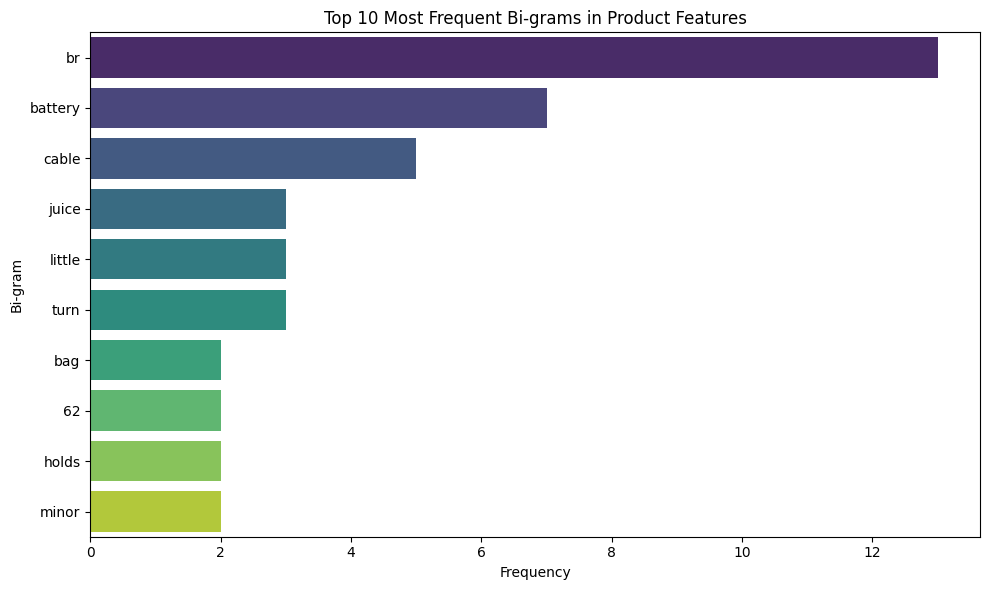

Top 10 Bi-grams:
br         13
battery     7
cable       5
juice       3
little      3
turn        3
bag         2
62          2
holds       2
minor       2
dtype: int64


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

vectorizer = CountVectorizer(strip_accents=ascii, stop_words='english', token_pattern='(?u)\\b\\w\\w+\\b',ngram_range=(1,1), analyzer='word', max_df=0.7, min_df=1, max_features=None, vocabulary=None)

X = vectorizer.fit_transform(SA_Textblob['review_body'])
ngrams = vectorizer.get_feature_names_out()

# Create frequency DataFrame
ngram_freq = pd.DataFrame(X.toarray(), columns=ngrams).sum().sort_values(ascending=False)
top_ngrams = ngram_freq.head(10)  # Get top 10 most frequent n-grams

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ngrams.values, y=top_ngrams.index, palette='viridis')
plt.title('Top 10 Most Frequent Bi-grams in Product Features')
plt.xlabel('Frequency')
plt.ylabel('Bi-gram')
plt.tight_layout()
plt.show()

# Display results
print("Top 10 Bi-grams:")
print(top_ngrams)